In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install nltk
%pip install Sastrawi
%pip install wordcloud
%pip install matplotlib


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 640.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 803.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 1.7 MB/s eta 0:00:07
   ---------------------------------------- 0.1/11.5 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.5 MB 1.6 MB/s eta 0:00:08
    --------------------------------------- 0.3/11.5 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.3/11.5 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.5 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.5/11.5 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.6/11.5 MB 1.5 MB/s eta 0:00:08
 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 814.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.1/11.1 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.1 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.1 MB 1.5 MB/s eta 0:00:08
   - -------------------------------------- 0.3/11.1 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.4/11.1 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.5/11.1 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.1 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/11.1 MB 1.6 MB/s eta 0:00:07
   -- ------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 284.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.7 kB ? eta -:--:--
     -------------------------- ----------- 41.0/57.7 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 608.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 640.0 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 1.0 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 1.1 MB/s eta 0:00:02
   ----- -----


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ---------- -------------------------- 30.7/104.0 kB 660.6 kB/s eta 0:00:01
     -------------------------- ------------ 71.7/104.0 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ 104.0/104.0 kB 997.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.2 kB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/301.2 kB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/301.2 kB 1.2 MB/s eta 0:00:01
   ----------------------------- ---------- 225.3/301.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data PreProcessing

In [ ]:
import pandas as pd

# df = pd.read_csv('sample_data/the_data_selected.csv', sep=';', encoding='ISO-8859-1')
df = pd.read_csv('sample_data/the_data_selected.csv', sep=',')
my_df = df[['score', 'content']]
my_df.head()

,score,content
0,1,Tidak bisa login ..
1,4,Kenapa tidak bisa masuk ke jobstreet?
2,1,Tidak ADA INFO cepat mengenai pemberitahuan le...
3,3,gabisa login teruss
4,3,Setelah update kenapa g bisa masuk????


### Menghitung Jumlah Baris

In [3]:
len(my_df.index)

3000

### Menghapus Baris yang Null

In [4]:
my_df = my_df.dropna(subset=['content'])
my_df.isnull().sum()

score      0
content    0
dtype: int64

### Menghitung Jumlah Baris setelah Null Dihilangkan

In [5]:
len(my_df)

3000

## a. Casefolding

Proses casefolding adalah proses mengubah seluruh huruf menjadi kecil.

In [6]:
import re
def clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    my_df[new_text_field_name] = my_df[new_text_field_name].str.replace(r"\d+", "")
    return my_df

In [7]:
my_df['text_clean'] = my_df['content'].str.lower()

In [8]:
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()

,score,content,text_clean
0,1,Tidak bisa login ..,tidak bisa login
1,4,Kenapa tidak bisa masuk ke jobstreet?,kenapa tidak bisa masuk ke jobstreet
2,1,Tidak ADA INFO cepat mengenai pemberitahuan le...,tidak ada info cepat mengenai pemberitahuan le...
3,3,gabisa login teruss,gabisa login teruss
4,3,Setelah update kenapa g bisa masuk????,setelah update kenapa g bisa masuk


## b. Filtering

Filtering Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Stopword biasanya dihilangkan dalam proses pengolahan teks. contoh dalam bahasa Indonesia seperti "dan", "atau", "yang", "di", "dari", "ke", "dengan", "jika", "ketika", "saat", "atau", "tetapi", "karena", "sehingga", "sebelum", "setelah", "agar", "supaya", "serta", "itulah", "yaitu", "misalnya", "contoh", "adalah", "yakni", "dst". Stopword mempunya informasi rencahan yang kecil, sehingga tidak berpengaruh dalam proses klasifikasi.

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('indonesian')
data_clean['text_Stopword'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\randi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,score,content,text_clean,text_Stopword
0,1,Tidak bisa login ..,tidak bisa login,login
1,4,Kenapa tidak bisa masuk ke jobstreet?,kenapa tidak bisa masuk ke jobstreet,masuk jobstreet
2,1,Tidak ADA INFO cepat mengenai pemberitahuan le...,tidak ada info cepat mengenai pemberitahuan le...,info cepat pemberitahuan mingisi form lamaran ...
3,3,gabisa login teruss,gabisa login teruss,gabisa login teruss
4,3,Setelah update kenapa g bisa masuk????,setelah update kenapa g bisa masuk,update g masuk


## c. Tokenizing

Tokenizing merupakan proses pemisahan text menjadi potongan-potongan yang lebih kecil. Tokenizing dapat dilakukan dengan menggunakan library NLTK.

In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize, sent_tokenize
data_clean['text_tokens'] = data_clean['text_Stopword'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\randi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\randi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,score,content,text_clean,text_Stopword,text_tokens
0,1,Tidak bisa login ..,tidak bisa login,login,[login]
1,4,Kenapa tidak bisa masuk ke jobstreet?,kenapa tidak bisa masuk ke jobstreet,masuk jobstreet,"[masuk, jobstreet]"
2,1,Tidak ADA INFO cepat mengenai pemberitahuan le...,tidak ada info cepat mengenai pemberitahuan le...,info cepat pemberitahuan mingisi form lamaran ...,"[info, cepat, pemberitahuan, mingisi, form, la..."
3,3,gabisa login teruss,gabisa login teruss,gabisa login teruss,"[gabisa, login, teruss]"
4,3,Setelah update kenapa g bisa masuk????,setelah update kenapa g bisa masuk,update g masuk,"[update, g, masuk]"


## d. Stemming

Stemming adalah proses pemetaan dan penguraian bentuk dari kata ke bentuk dasarnya. Stemming dilakukan dengan menghilangkan imbuhan-imbuhan yang terdapat pada kata. Contoh stemming adalah mengubah kata "membaca" menjadi "baca".

In [11]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung = 0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# Apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_tokens_stemmed'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)


5117
------------------------
1 : login : login
2 : masuk : masuk
3 : jobstreet : jobstreet
4 : info : info
5 : cepat : cepat
6 : pemberitahuan : pemberitahuan
7 : mingisi : mingisi
8 : form : form
9 : lamaran : lamar
10 : kerja : kerja
11 : pikir : pikir
12 : aplikasi : aplikasi
13 : yg : yg
14 : lambat : lambat
15 : efisien : efisien
16 : mencari : cari
17 : pekerjaan : kerja
18 : abu : abu
19 : gabisa : gabisa
20 : teruss : teruss
21 : update : update
22 : g : g
23 : susah : susah
24 : akun : akun
25 : log : log
26 : out : out
27 : banget : banget
28 : tolong : tolong
29 : perbaiki : baik
30 : diakses : akses
31 : busuk : busuk
32 : join : join
33 : 2011 : 2011
34 : sampe : sampe
35 : 2025 : 2025
36 : offering : offering
37 : latter : latter
38 : kebanyakan : banyak
39 : ghosting : ghosting
40 : hr : hr
41 : nya : nya
42 : ampun : ampun
43 : deh : deh
44 : 14 : 14
45 : buang : buang
46 : gagal : gagal
47 : jelek : jelek
48 : aja : aja
49 : pencarian : cari
50 : sesuai : sesuai
51 : 

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed
0,1,Tidak bisa login ..,tidak bisa login,login,[login],login
1,4,Kenapa tidak bisa masuk ke jobstreet?,kenapa tidak bisa masuk ke jobstreet,masuk jobstreet,"[masuk, jobstreet]",masuk jobstreet
2,1,Tidak ADA INFO cepat mengenai pemberitahuan le...,tidak ada info cepat mengenai pemberitahuan le...,info cepat pemberitahuan mingisi form lamaran ...,"[info, cepat, pemberitahuan, mingisi, form, la...",info cepat pemberitahuan mingisi form lamar ke...
3,3,gabisa login teruss,gabisa login teruss,gabisa login teruss,"[gabisa, login, teruss]",gabisa login teruss
4,3,Setelah update kenapa g bisa masuk????,setelah update kenapa g bisa masuk,update g masuk,"[update, g, masuk]",update g masuk
5,1,Susah masuk,susah masuk,susah masuk,"[susah, masuk]",susah masuk
6,1,"Akun tiba² log out sendiri, sekali mau login s...",akun tiba log out sendiri sekali mau login sus...,akun log out login susah banget tolong perbaik...,"[akun, log, out, login, susah, banget, tolong,...",akun log out login susah banget tolong baik akses
7,1,Aplikasi busuk,aplikasi busuk,aplikasi busuk,"[aplikasi, busuk]",aplikasi busuk
8,1,Join dari 2011 sampe 2025 belum pernah dapat o...,join dari 2011 sampe 2025 belum pernah dapat o...,join 2011 sampe 2025 offering latter kebanyaka...,"[join, 2011, sampe, 2025, offering, latter, ke...",join 2011 sampe 2025 offering latter banyak gh...
9,2,Buat login susah. Gagal terus,buat login susah gagal terus,login susah gagal,"[login, susah, gagal]",login susah gagal


In [14]:
data_clean.to_csv('sample_data/the_data_hasiltextpreprocessing.csv', index=False)

# Data Labelling

In [88]:
# import data hasil text pre processing
import pandas as pd
df = pd.read_csv('sample_data/the_data_hasiltextpreprocessing.csv', sep=',')
my_df = df[['score', 'content', 'text_clean', 'text_Stopword', 'text_tokens', 'text_tokens_stemmed']]


def pelabelan(skor):
    if skor < 3:
        return 'negatif'
    elif skor == 4:
        return 'positif'
    elif skor == 5:
        return 'positif'
my_df['Label'] = my_df['score'].apply(pelabelan)
my_df = my_df.dropna()

my_df.to_csv('sample_data/the_data_hasillabeling.csv', index=False)

my_df.head()

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,1,Tidak bisa login ..,tidak bisa login,login,['login'],login,negatif
1,4,Kenapa tidak bisa masuk ke jobstreet?,kenapa tidak bisa masuk ke jobstreet,masuk jobstreet,"['masuk', 'jobstreet']",masuk jobstreet,positif
2,1,"Tidak ADA INFO cepat mengenai pemberitahuan lebih lanjut setelah mingisi form lamaran kerja, saya pikir ini aplikasi yg lambat dan tidak efisien dalam mencari pekerjaan karena masih abu""",tidak ada info cepat mengenai pemberitahuan lebih lanjut setelah mingisi form lamaran kerja saya pikir ini aplikasi yg lambat dan tidak efisien dalam mencari pekerjaan karena masih abu,info cepat pemberitahuan mingisi form lamaran kerja pikir aplikasi yg lambat efisien mencari pekerjaan abu,"['info', 'cepat', 'pemberitahuan', 'mingisi', 'form', 'lamaran', 'kerja', 'pikir', 'aplikasi', 'yg', 'lambat', 'efisien', 'mencari', 'pekerjaan', 'abu']",info cepat pemberitahuan mingisi form lamar kerja pikir aplikasi yg lambat efisien cari kerja abu,negatif
5,1,Susah masuk,susah masuk,susah masuk,"['susah', 'masuk']",susah masuk,negatif
6,1,"Akun tiba² log out sendiri, sekali mau login susah banget sekarang. Tolong perbaiki lagi supaya bisa diakses kembali seperti semula.",akun tiba log out sendiri sekali mau login susah banget sekarang tolong perbaiki lagi supaya bisa diakses kembali seperti semula,akun log out login susah banget tolong perbaiki diakses,"['akun', 'log', 'out', 'login', 'susah', 'banget', 'tolong', 'perbaiki', 'diakses']",akun log out login susah banget tolong baik akses,negatif


### Menampilkan isi Data Hasil Labelling

In [89]:
import pandas as pd
hasillabeling = pd.read_csv('sample_data/the_data_hasillabeling.csv')
pd.set_option('display.max_colwidth', None)
hasillabeling[['content', 'text_clean', 'text_Stopword', 'text_tokens', 'text_tokens_stemmed', 'Label']].head(6)

,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,Tidak bisa login ..,tidak bisa login,login,['login'],login,negatif
1,Kenapa tidak bisa masuk ke jobstreet?,kenapa tidak bisa masuk ke jobstreet,masuk jobstreet,"['masuk', 'jobstreet']",masuk jobstreet,positif
2,"Tidak ADA INFO cepat mengenai pemberitahuan lebih lanjut setelah mingisi form lamaran kerja, saya pikir ini aplikasi yg lambat dan tidak efisien dalam mencari pekerjaan karena masih abu""",tidak ada info cepat mengenai pemberitahuan lebih lanjut setelah mingisi form lamaran kerja saya pikir ini aplikasi yg lambat dan tidak efisien dalam mencari pekerjaan karena masih abu,info cepat pemberitahuan mingisi form lamaran kerja pikir aplikasi yg lambat efisien mencari pekerjaan abu,"['info', 'cepat', 'pemberitahuan', 'mingisi', 'form', 'lamaran', 'kerja', 'pikir', 'aplikasi', 'yg', 'lambat', 'efisien', 'mencari', 'pekerjaan', 'abu']",info cepat pemberitahuan mingisi form lamar kerja pikir aplikasi yg lambat efisien cari kerja abu,negatif
3,Susah masuk,susah masuk,susah masuk,"['susah', 'masuk']",susah masuk,negatif
4,"Akun tiba² log out sendiri, sekali mau login susah banget sekarang. Tolong perbaiki lagi supaya bisa diakses kembali seperti semula.",akun tiba log out sendiri sekali mau login susah banget sekarang tolong perbaiki lagi supaya bisa diakses kembali seperti semula,akun log out login susah banget tolong perbaiki diakses,"['akun', 'log', 'out', 'login', 'susah', 'banget', 'tolong', 'perbaiki', 'diakses']",akun log out login susah banget tolong baik akses,negatif
5,Aplikasi busuk,aplikasi busuk,aplikasi busuk,"['aplikasi', 'busuk']",aplikasi busuk,negatif


### Jumlah Label Aktual

In [17]:
len(hasillabeling)

2719

### Jumlah Label Mentah Positif dan Presentase

In [18]:
positive_count = hasillabeling[hasillabeling['Label'] == 'positif'].shape[0]
print(positive_count)

1343


In [19]:
total_count = len(hasillabeling)
positive_percentage = (positive_count / total_count) * 100
print(f"Percentage of positive reviews: {positive_percentage:.2f}%")

Percentage of positive reviews: 49.39%


### Jumlah Label Mentah Negatif dan Presentase

In [20]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
print(negative_count)

1376


In [21]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
negative_percentage = (negative_count / total_count) * 100
print(f"Percentage of negative reviews: {negative_percentage:.2f}%")

Percentage of negative reviews: 50.61%


# Data Extracting

In [2]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Drop Kolom yang Tidak Digunakan

In [3]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])

### Setup TFIDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

### Menampilkan Jumlah Data Hasil Extracting

In [5]:
print(A.shape)
print(A_tfid.shape)
print(A_fit_tfid.shape)

(2695,)
(2695, 4007)
(2695, 4007)


### Konversi Data Hasil Extracting ke Array

In [6]:
A_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2695, 4007))

In [7]:
print(A_tfid[:10].nonzero(), A_tfid[:10].data)


(array([0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9],
      dtype=int32), array([2089, 1635, 2225,  129,  291,  718,  733, 1058, 1149, 1462, 1815,
       1987, 1997, 2320, 2768, 2855, 3995, 2225, 3533,  193,  199,  402,
        419, 2087, 2089, 2663, 3533, 3736,  291,  675,   15,   46,   58,
        240,  435,  648,  859, 1232, 1406, 1659, 2026, 2572, 2613, 3186,
       3995, 1179, 2089, 3533,  168,  291,  371,  718,  842, 1591, 1635,
       1815, 1849, 1987, 2498, 2717, 3343, 3690,  971, 2482], dtype=int32)) [1.         0.61911929 0.78529695 0.36324008 0.11359007 0.13326069
 0.24051658 0.32268217 0.36324008 0.20165046 0.21284013 0.14280182
 0.31461204 0.36324008 0.29666488 0.31461204 0.13859692 0.6666488
 0.74537197 0.43188582 0.30582213 0.2985961  0.30582213 0.35427052
 0.24423793 0.43188582 0.30244727 0.27221532 0.33959201 0

In [12]:
print(A_tfid)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20735 stored elements and shape (2695, 4007)>
  Coords	Values
  (0, 2089)	1.0
  (1, 1635)	0.6191192885301465
  (1, 2225)	0.7852969543872721
  (2, 129)	0.3632400781468523
  (2, 291)	0.11359007081092147
  (2, 718)	0.13326068691054477
  (2, 733)	0.2405165780730725
  (2, 1058)	0.3226821674842421
  (2, 1149)	0.3632400781468523
  (2, 1462)	0.20165045854296404
  (2, 1815)	0.21284012800025814
  (2, 1987)	0.1428018157279765
  (2, 1997)	0.31461204175330454
  (2, 2320)	0.3632400781468523
  (2, 2768)	0.29666488037820177
  (2, 2855)	0.31461204175330454
  (2, 3995)	0.13859691737357246
  (3, 2225)	0.6666488033059508
  (3, 3533)	0.7453719695901796
  (4, 193)	0.4318858235253702
  (4, 199)	0.30582212747153076
  (4, 402)	0.29859609517606317
  (4, 419)	0.30582212747153076
  (4, 2087)	0.35427052101026735
  (4, 2089)	0.24423793049034048
  :	:
  (2689, 2394)	0.5349688278684719
  (2689, 3393)	0.4445971275300476
  (2689, 3825)	0.43691892187487213
  

In [16]:
import pandas as pd

# Fitur kata
features = tfid_vectorizer.get_feature_names_out()

# Bobot tiap kata
weights = A_fit_tfid.toarray().sum(axis=0)

# DataFrame fitur dan bobotnya
df_weights = pd.DataFrame({'Kata': features, 'Bobot': weights})

# Simpan ke CSV
df_weights.to_csv('sample_data/the_datakata_dan_bobot.csv', index=False)


In [ ]:
# Jumlah kata dalam tiap dokumen
word_counts = A_fit_tfid.toarray().sum(axis=1)

# Total kata dalam seluruh dokumen (1 angka total)
total_words = A_fit_tfid.toarray().sum()

# DataFrame jumlah kata per dokumen
df_word_counts = pd.DataFrame({'Dokumen_Index': range(len(word_counts)), 'Jumlah_Kata': word_counts})

# Tambahkan total kata ke baris terakhir (opsional)
df_word_counts.loc[len(df_word_counts)] = ['Total', total_words]

# DataFrame kata dan bobotnya
df_words = pd.DataFrame({'Kata': features, 'Bobot': weights})

# Gabungkan DataFrame jumlah kata per dokumen dengan DataFrame kata dan bobotnya
df_combined = pd.concat([df_word_counts, df_words], axis=1)

# Simpan ke CSV
df_combined.to_csv('sample_data/the_jumlah_kata_per_dokumen_dan_kata.csv', index=False)


# Penerapan Algoritma

## a. Naive Bayes

### 1. Cara Konvensional

In [85]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(A_tfid, B)

MultinomialNB()

In [86]:
B_pred = nb.predict(A_tfid)
data_clean['Label NB'] = B_pred
data_clean = pd.DataFrame(data_clean)
data_clean.to_csv('sample_data/the_data_hasil_sentimen_NB.csv', index=False)

data_clean.head()

,userName,at,content,text_tokens_stemmed,Label,Label NB
0,Pengguna Google,2025-02-06 11:48:26,Tidak bisa login ..,login,negatif,negatif
1,Pengguna Google,2025-02-06 10:57:42,Kenapa tidak bisa masuk ke jobstreet?,masuk jobstreet,positif,positif
2,Pengguna Google,2025-02-06 09:02:23,"Tidak ADA INFO cepat mengenai pemberitahuan lebih lanjut setelah mingisi form lamaran kerja, saya pikir ini aplikasi yg lambat dan tidak efisien dalam mencari pekerjaan karena masih abu""",info cepat pemberitahuan mingisi form lamar kerja pikir aplikasi yg lambat efisien cari kerja abu,negatif,positif
3,Pengguna Google,2025-02-05 08:58:50,Susah masuk,susah masuk,negatif,negatif
4,Pengguna Google,2025-02-04 19:48:15,"Akun tiba² log out sendiri, sekali mau login susah banget sekarang. Tolong perbaiki lagi supaya bisa diakses kembali seperti semula.",akun log out login susah banget tolong baik akses,negatif,negatif


### 2. Cara Pakai 5K-Fold Cross Validation

In [30]:

from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Inisialisasi model MultinomialNB
model = MultinomialNB()

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B.iloc[train_index], B.iloc[test_index]


    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label NB Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_NB_average.csv', index=False)


Fold Accuracies: [0.8841911764705882, 0.8529411764705882, 0.8492647058823529, 0.8805147058823529, 0.848987108655617]
Mean Accuracy: 0.8631797746722999
Standard Deviation of Accuracy: 0.01575987720010876
Overall Accuracy with Average Predictions: 0.8631849944832659


## b. Support Vector Machine (SVM)

### 1. Cara Konvensional

In [31]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

Accuracy for C=0.01: 0.8462670099301214
Accuracy for C=0.05: 0.913571165869805
Accuracy for C=0.25: 0.9477749172489885
Accuracy for C=0.5: 0.9668995954394998
Accuracy for C=0.75: 0.9727841118058109
Accuracy for C=1: 0.9775652813534388


LinearSVC(C=1)

In [32]:
B_pred = svm.predict(A_tfid)
data_clean['Label SVM'] = B_pred
data_clean.to_csv('sample_data/the_data_hasil_sentimen_SVM.csv', index=False)
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM
0,Tidak bisa login ..,login,negatif,negatif,negatif,negatif
1,Kenapa tidak bisa masuk ke jobstreet?,masuk jobstreet,positif,negatif,negatif,negatif
2,"Tidak ADA INFO cepat mengenai pemberitahuan lebih lanjut setelah mingisi form lamaran kerja, saya pikir ini aplikasi yg lambat dan tidak efisien dalam mencari pekerjaan karena masih abu""",info cepat pemberitahuan mingisi form lamar kerja pikir aplikasi yg lambat efisien cari kerja abu,negatif,positif,positif,negatif
3,Susah masuk,susah masuk,negatif,negatif,negatif,negatif
4,"Akun tiba² log out sendiri, sekali mau login susah banget sekarang. Tolong perbaiki lagi supaya bisa diakses kembali seperti semula.",akun log out login susah banget tolong baik akses,negatif,negatif,negatif,negatif


### 2. Cara Pakai 5K-Fold Cross Validation

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42, C = 1.0)

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label SVM Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_SVM_average.csv', index=False)


Fold Accuracies: [0.8676470588235294, 0.8676470588235294, 0.8676470588235294, 0.8841911764705882, 0.8637200736648251]
Mean Accuracy: 0.8701704853212003
Standard Deviation of Accuracy: 0.007173432019761086
Overall Accuracy with Average Predictions: 0.8701728576682604


In [34]:
data_clean.to_csv('sample_data/the_data_hasil_NB_dan_SVM.csv', index=False)

## C. Neural Network

In [35]:
import numpy as np

# Convert B to 0 for 'negatif' and 1 for 'positif'
B = B.apply(lambda x: 0 if x == 'negatif' else 1)

# Convert B to a 2-dimensional array
B_array = B.values.reshape(-1, 1)
print(B_array)

[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


# Evaluasi Model

In [36]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Menampilkan 5 baris data_clean

In [37]:
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Tidak bisa login ..,login,negatif,negatif,negatif,negatif,negatif
1,Kenapa tidak bisa masuk ke jobstreet?,masuk jobstreet,positif,negatif,negatif,negatif,negatif
2,"Tidak ADA INFO cepat mengenai pemberitahuan lebih lanjut setelah mingisi form lamaran kerja, saya pikir ini aplikasi yg lambat dan tidak efisien dalam mencari pekerjaan karena masih abu""",info cepat pemberitahuan mingisi form lamar kerja pikir aplikasi yg lambat efisien cari kerja abu,negatif,positif,positif,negatif,positif
3,Susah masuk,susah masuk,negatif,negatif,negatif,negatif,negatif
4,"Akun tiba² log out sendiri, sekali mau login susah banget sekarang. Tolong perbaiki lagi supaya bisa diakses kembali seperti semula.",akun log out login susah banget tolong baik akses,negatif,negatif,negatif,negatif,negatif


### Menghitung Jumlah Baris data_clean

In [38]:
len(data_clean)

2719

### Setup TFIDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

## a1. k-fold Cross Validation NB

In [40]:
# a1. k-fold Cross Validation NB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")


Akurasi setiap fold: [0.87132353 0.85294118 0.84558824 0.84926471 0.87845304]
Rata-rata akurasi: 0.8595141371465713
Standar deviasi: 0.01296402045996716
Akurasi tertinggi: 0.8784530386740331
Akurasi terendah: 0.8455882352941176
Waktu eksekusi: 0.8595141371465713


## a2. k-fold Cross Validation SVM

In [41]:
# a2. k-fold Cross Validation SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

Accuracy for C=0.01: 0.8462670099301214
Accuracy for C=0.05: 0.913571165869805
Accuracy for C=0.25: 0.9477749172489885
Accuracy for C=0.5: 0.9668995954394998
Accuracy for C=0.75: 0.9727841118058109
Accuracy for C=1: 0.9775652813534388
Akurasi setiap fold: [0.86029412 0.84742647 0.84191176 0.84191176 0.84898711]
Rata-rata akurasi: 0.8481062452605352
Standar deviasi: 0.006730905227679648
Akurasi tertinggi: 0.8602941176470589
Akurasi terendah: 0.8419117647058824
Waktu eksekusi: 0.8481062452605352


## b1. Metriks NB

In [42]:
# b1. Metriks NB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

Accuracy score: 0.9168812063258551
Precision score: 0.9223424989532462
Recall score: 0.9168812063258551
F1 score: 0.9165481093339548
confusion matrix:
[[1341   35]
 [ 191 1152]]

              precision    recall  f1-score   support

     negatif       0.88      0.97      0.92      1376
     positif       0.97      0.86      0.91      1343

    accuracy                           0.92      2719
   macro avg       0.92      0.92      0.92      2719
weighted avg       0.92      0.92      0.92      2719



## b2. Metriks SVM

In [43]:
# b2. Metriks SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Accuracy score: 0.9775652813534388
Precision score: 0.9777219134466022
Recall score: 0.9775652813534388
F1 score: 0.9775608791726381
confusion matrix:
[[1358   18]
 [  43 1300]]

              precision    recall  f1-score   support

     negatif       0.97      0.99      0.98      1376
     positif       0.99      0.97      0.98      1343

    accuracy                           0.98      2719
   macro avg       0.98      0.98      0.98      2719
weighted avg       0.98      0.98      0.98      2719



# Analisis dan Perbandingan Hasil

## a. Perbandingan Akurasi

In [44]:
print(f"Rata-rata akurasi NB (K-Fold Cross Validation): {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Rata-rata akurasi SVM (K-Fold Cross Validation): {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

# Metriks NB
print("")
print("Metriks NB")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

# Metriks SVM
print("")
print("Metriks SVM")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Rata-rata akurasi NB (K-Fold Cross Validation): 0.8595141371465713
Rata-rata akurasi SVM (K-Fold Cross Validation): 0.8481062452605352

Metriks NB
Accuracy score: 0.9168812063258551
Precision score: 0.9223424989532462
Recall score: 0.9168812063258551
F1 score: 0.9165481093339548
confusion matrix:
[[1341   35]
 [ 191 1152]]

              precision    recall  f1-score   support

     negatif       0.88      0.97      0.92      1376
     positif       0.97      0.86      0.91      1343

    accuracy                           0.92      2719
   macro avg       0.92      0.92      0.92      2719
weighted avg       0.92      0.92      0.92      2719


Metriks SVM
Accuracy score: 0.9775652813534388
Precision score: 0.9777219134466022
Recall score: 0.9775652813534388
F1 score: 0.9775608791726381
confusion matrix:
[[1358   18]
 [  43 1300]]

              precision    recall  f1-score   support

     negatif       0.97      0.99      0.98      1376
     positif       0.99      0.97      0.98   

## b. Interpretasi Hasil

Berikut adalah interpretasi hasil yang dapat dijelaskan berdasarkan data yang diberikan:

1. Analisis Performa Naive Bayes (NB)
Naive Bayes adalah algoritma berbasis probabilitas yang mengasumsikan bahwa setiap fitur bersifat independen. Karena asumsi ini, NB bekerja sangat baik pada dataset yang memiliki fitur sederhana dan distribusi data yang sesuai dengan asumsi independensi.

Akurasi rata-rata: 0.8797 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9324), menunjukkan kinerja yang cukup stabil.
Confusion Matrix:
False Positive (FP): 58 ulasan negatif salah diklasifikasikan sebagai negatif.
False Negative (FN): 128 ulasan negatif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.96, artinya model mampu memprediksi ulasan positif dengan baik, meskipun ada beberapa kesalahan.
Recall (Negatif): 0.95, menunjukkan bahwa sebagian besar ulasan negatif terdeteksi dengan benar.
Kelemahan NB
Asumsi independensi antar fitur bisa menjadi terlalu sederhana, terutama jika fitur ulasan memiliki korelasi yang tinggi.
Rentan terhadap misclassifikasi, 
Misclassifikasi adalah kesalahan dalam pengklasifikasian data, yaitu ketika model prediksi salah menentukan label suatu data. Contohnya:

False Positive (FP): Data negatif diprediksi sebagai positif.
False Negative (FN): Data positif diprediksi sebagai negatif.
Ini mencerminkan ketidakakuratan model dalam memisahkan kelas dengan benar.

Kelebihan NB
Algoritma yang cepat dan efisien, terutama untuk dataset besar.
Sangat cocok untuk data teks, seperti ulasan, karena bekerja dengan representasi berbasis frekuensi seperti bag-of-words atau TF-IDF.
Namun, pada kasus ini, akurasi rata-rata NB lebih rendah dibandingkan SVM. Hal ini mungkin disebabkan oleh asumsi independensi fitur yang tidak sepenuhnya berlaku, sehingga NB kehilangan sensitivitas terhadap pola-pola kompleks dalam ulasan.

2. Analisis Performa Support Vector Machine (SVM)
SVM adalah algoritma pembelajaran mesin yang bekerja dengan cara mencari hyperplane terbaik untuk memisahkan data ke dalam kelas-kelas yang berbeda. SVM dikenal sangat baik dalam menangani data berdimensi tinggi dan non-linear, terutama dengan kernel yang sesuai.

Akurasi rata-rata: 0.8579 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9785), menunjukkan performa yang baik secara konsisten.
Confusion Matrix:
False Positive (FP): 24 ulasan negatif salah diklasifikasikan sebagai positif.
False Negative (FN): 35 ulasan positif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.98, menunjukkan model sangat andal dalam memprediksi ulasan positif.
Recall (Negatif): 0.98, artinya sebagian besar ulasan negatif teridentifikasi dengan benar.
Kelebihan SVM
SVM lebih robust terhadap pola-pola yang kompleks karena menggunakan margin optimal untuk memisahkan data.
Lebih tahan terhadap overfitting, terutama ketika kernel yang digunakan sesuai.
Kelemahan SVM
Proses pelatihan lebih lama dibandingkan NB, terutama pada dataset besar.
Kurang cocok jika data memiliki banyak noise atau tidak terpisahkan secara linear.

3. Perbandingan Akurasi
Perbedaan rata-rata akurasi antara NB (0.8797) dan SVM (0.8579) pada K-Fold Cross Validation cukup kecil, tetapi pada data uji, akurasi SVM (0.9785) jauh lebih tinggi dibandingkan NB (0.9324). Hal ini menunjukkan bahwa SVM mampu memanfaatkan pola-pola yang lebih kompleks dalam ulasan, sehingga memberikan hasil yang lebih akurat.

Mengapa SVM Lebih Akurat?

Kemampuan menangkap pola kompleks: SVM menggunakan hyperplane untuk memisahkan kelas yang mungkin tidak linear, sementara NB hanya menggunakan probabilitas berdasarkan fitur independen.
Penanganan outlier: Margin SVM yang optimal membantu mengurangi pengaruh data outlier, sedangkan NB lebih rentan terhadap kesalahan ini.
Penggunaan kernel: Jika kernel yang digunakan sesuai (seperti RBF atau linear), SVM dapat bekerja sangat baik pada data yang tidak terdistribusi secara normal.
Mengapa NB Masih Kompetitif?

Meski akurasinya lebih rendah, NB tetap memberikan hasil yang cepat dan efisien karena kesederhanaannya.
NB memiliki trade-off performa yang baik, terutama jika dataset tidak memiliki pola kompleks atau berisi banyak noise.


# Kesimpulan

Naive Bayes bekerja baik untuk ulasan yang memiliki pola sederhana dan independen antar fitur. Namun, asumsi independensi fitur membuatnya kalah performa dibandingkan SVM pada data ulasan ini.
SVM lebih unggul karena mampu menangkap pola kompleks antar fitur dan lebih robust terhadap outlier. Namun, ini datang dengan biaya komputasi yang lebih tinggi.
Perbedaan Akurasi:
Perbedaan akurasi mungkin muncul karena NB kesulitan menangani korelasi antar fitur dalam ulasan, sementara SVM dapat memisahkan kelas secara lebih presisi.

### Menampilkan 5 baris my_df

In [45]:
my_df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
my_df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Tidak bisa login ..,login,negatif,negatif,negatif,negatif,negatif
1,Kenapa tidak bisa masuk ke jobstreet?,masuk jobstreet,positif,negatif,negatif,negatif,negatif
2,"Tidak ADA INFO cepat mengenai pemberitahuan lebih lanjut setelah mingisi form lamaran kerja, saya pikir ini aplikasi yg lambat dan tidak efisien dalam mencari pekerjaan karena masih abu""",info cepat pemberitahuan mingisi form lamar kerja pikir aplikasi yg lambat efisien cari kerja abu,negatif,positif,positif,negatif,positif
3,Susah masuk,susah masuk,negatif,negatif,negatif,negatif,negatif
4,"Akun tiba² log out sendiri, sekali mau login susah banget sekarang. Tolong perbaiki lagi supaya bisa diakses kembali seperti semula.",akun log out login susah banget tolong baik akses,negatif,negatif,negatif,negatif,negatif


### Memberikan Informasi my_df

In [46]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 0 to 2718
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   content              2719 non-null   object
 1   text_tokens_stemmed  2695 non-null   object
 2   Label                2719 non-null   object
 3   Label NB             2719 non-null   object
 4   Label NB Average     2719 non-null   object
 5   Label SVM            2719 non-null   object
 6   Label SVM Average    2719 non-null   object
dtypes: object(7)
memory usage: 148.8+ KB


### Mengecek Missing Value

In [47]:
my_df.isna()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2714,False,False,False,False,False,False,False
2715,False,False,False,False,False,False,False
2716,False,False,False,False,False,False,False
2717,False,False,False,False,False,False,False


In [48]:
my_df.isna().any()

content                False
text_tokens_stemmed     True
Label                  False
Label NB               False
Label NB Average       False
Label SVM              False
Label SVM Average      False
dtype: bool

### Mendeskripsikan my_df

In [49]:
my_df.describe()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
count,2719,2695,2719,2719,2719,2719,2719
unique,2429,2290,2,2,2,2,2
top,Good,good,negatif,negatif,negatif,negatif,negatif
freq,69,81,1376,1532,1550,1401,1453


### Menghitung Jumlah Baris yang memiliki NULL

In [50]:
my_df.isnull().sum()

content                 0
text_tokens_stemmed    24
Label                   0
Label NB                0
Label NB Average        0
Label SVM               0
Label SVM Average       0
dtype: int64

# Visualization

In [51]:
import pandas as pd

df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Tidak bisa login ..,login,negatif,negatif,negatif,negatif,negatif
1,Kenapa tidak bisa masuk ke jobstreet?,masuk jobstreet,positif,negatif,negatif,negatif,negatif
2,"Tidak ADA INFO cepat mengenai pemberitahuan lebih lanjut setelah mingisi form lamaran kerja, saya pikir ini aplikasi yg lambat dan tidak efisien dalam mencari pekerjaan karena masih abu""",info cepat pemberitahuan mingisi form lamar kerja pikir aplikasi yg lambat efisien cari kerja abu,negatif,positif,positif,negatif,positif
3,Susah masuk,susah masuk,negatif,negatif,negatif,negatif,negatif
4,"Akun tiba² log out sendiri, sekali mau login susah banget sekarang. Tolong perbaiki lagi supaya bisa diakses kembali seperti semula.",akun log out login susah banget tolong baik akses,negatif,negatif,negatif,negatif,negatif


### Menghitung Jumlah Baris df

In [52]:
len(df)

2719

## Wordcloud Klasifikasi Sentimen Semua

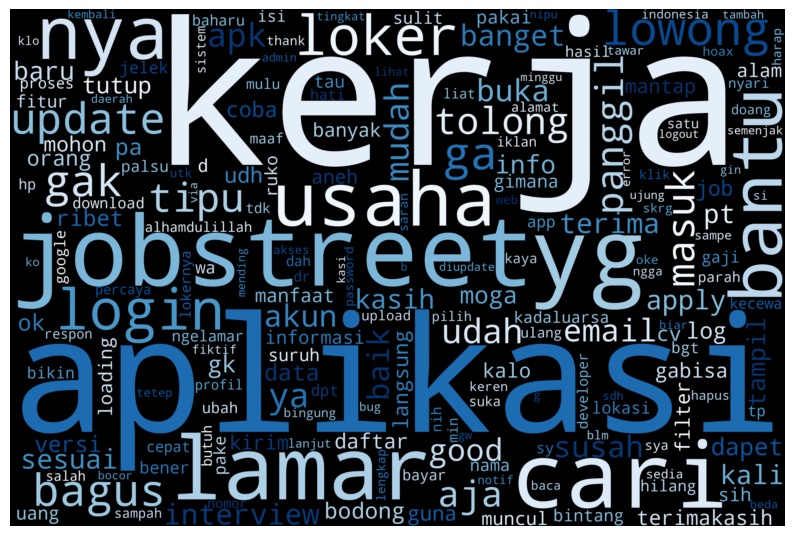

In [53]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# # Filter data untuk hanya menyertakan tweet positif
# netral_tweets = my_df[my_df['Label'] == 'None']

# # Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
# netral_words = ' '.join([tweets for tweets in netral_tweets['content']])

# Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
all_words = ' '.join([tweets for tweets in df['text_tokens_stemmed'].fillna('')])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(all_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Positif NB

### 1. Naive Bayes

#### Menghitung Jumlah Baris Positif

In [54]:
df[df['Label NB Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
2,"Tidak ADA INFO cepat mengenai pemberitahuan lebih lanjut setelah mingisi form lamaran kerja, saya pikir ini aplikasi yg lambat dan tidak efisien dalam mencari pekerjaan karena masih abu""",info cepat pemberitahuan mingisi form lamar kerja pikir aplikasi yg lambat efisien cari kerja abu,negatif,positif,positif,negatif,positif
10,Good,good,positif,positif,positif,positif,positif
13,Terima kasih untuk info loker perkerjaan,terima kasih info loker kerja,positif,positif,positif,positif,positif
34,Lengkap dan Terpercaya,lengkap percaya,positif,positif,positif,positif,positif
35,Good,good,positif,positif,positif,positif,positif


In [55]:
len(df[df['Label NB Average'] == 'positif'])

1169

#### Penerapan Wordcloud

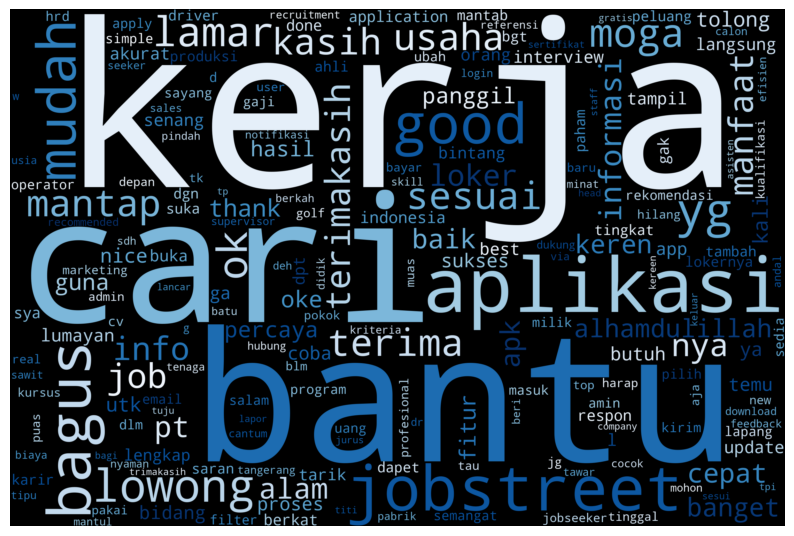

In [56]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')
    plt.show()

netral_tweets = df[df['Label NB Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])


wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 2. SVM

#### Menghitung Jumlah Baris Positif

In [57]:
df[df['Label SVM Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
2,"Tidak ADA INFO cepat mengenai pemberitahuan lebih lanjut setelah mingisi form lamaran kerja, saya pikir ini aplikasi yg lambat dan tidak efisien dalam mencari pekerjaan karena masih abu""",info cepat pemberitahuan mingisi form lamar kerja pikir aplikasi yg lambat efisien cari kerja abu,negatif,positif,positif,negatif,positif
10,Good,good,positif,positif,positif,positif,positif
11,Aplikasi terbaik 👍🎉,aplikasi baik,positif,negatif,negatif,positif,positif
13,Terima kasih untuk info loker perkerjaan,terima kasih info loker kerja,positif,positif,positif,positif,positif
34,Lengkap dan Terpercaya,lengkap percaya,positif,positif,positif,positif,positif


In [58]:
len(df[df['Label SVM Average'] == 'positif'])

1266

#### Penerapan Wordcloud

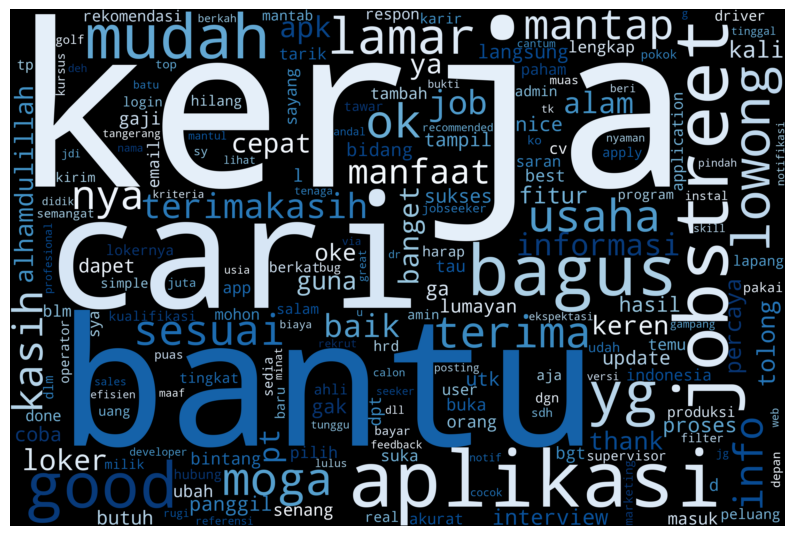

In [59]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')


    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Negatif

### 1. Naive Bayes

#### Menghitung Jumlah Baris Negatif

In [60]:
df[df['Label NB Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Tidak bisa login ..,login,negatif,negatif,negatif,negatif,negatif
1,Kenapa tidak bisa masuk ke jobstreet?,masuk jobstreet,positif,negatif,negatif,negatif,negatif
3,Susah masuk,susah masuk,negatif,negatif,negatif,negatif,negatif
4,"Akun tiba² log out sendiri, sekali mau login susah banget sekarang. Tolong perbaiki lagi supaya bisa diakses kembali seperti semula.",akun log out login susah banget tolong baik akses,negatif,negatif,negatif,negatif,negatif
5,Aplikasi busuk,aplikasi busuk,negatif,negatif,negatif,negatif,negatif


In [61]:
len(df[df['Label NB Average'] == 'negatif'])

1550

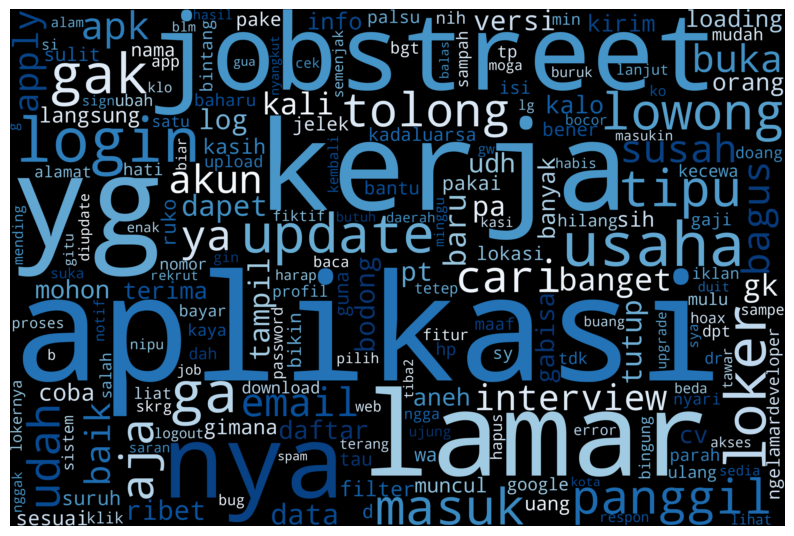

In [62]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label NB Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 2. SVM

#### Menghitung Jumlah Baris Negatif

In [63]:
df[df['Label SVM Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Tidak bisa login ..,login,negatif,negatif,negatif,negatif,negatif
1,Kenapa tidak bisa masuk ke jobstreet?,masuk jobstreet,positif,negatif,negatif,negatif,negatif
3,Susah masuk,susah masuk,negatif,negatif,negatif,negatif,negatif
4,"Akun tiba² log out sendiri, sekali mau login susah banget sekarang. Tolong perbaiki lagi supaya bisa diakses kembali seperti semula.",akun log out login susah banget tolong baik akses,negatif,negatif,negatif,negatif,negatif
5,Aplikasi busuk,aplikasi busuk,negatif,negatif,negatif,negatif,negatif


In [64]:
len(df[df['Label SVM Average'] == 'negatif'])

1453

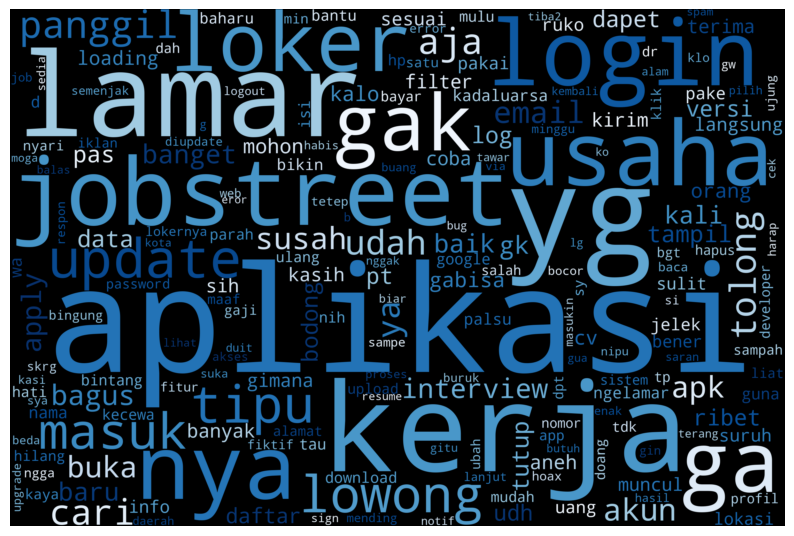

In [65]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)